[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sotirischatzimiltis/MscThesis/blob/main/DataPreProcessing/data_preprocessing.ipynb)

# Import necessary packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Dataset Analysis

## Read files from GitLab Repository

In [ ]:
train_url="https://gitlab.com/schatz06/smart-grid-metering-ids/-/raw/main/NSLKDD/KDDTrain.txt"
test_url= "https://gitlab.com/schatz06/smart-grid-metering-ids/-/raw/main/NSLKDD/KDDTest.txt"
TRAIN_FILE="KDDTrain.txt"
TEST_FILE="KDDTest.txt"

In [ ]:
![ -f "$TRAIN_FILE" ] && echo "$TRAIN_FILE exists" || wget "$train_url"
![ -f "$TEST_FILE" ] && echo "$TEST_FILE exists" || wget "$test_url"

KDDTrain.txt exists
KDDTest.txt exists


## Train Dataset Analyisis 

#### Create Dataframe

In [ ]:
initial_trainset = pd.read_csv("KDDTrain.txt", sep=",",header =None) # read train dataset / create dataframe
rows = initial_trainset.shape[0] # get rows of dataframe
columns = initial_trainset.shape[1] # get columns of dataframe 

initial_testset = pd.read_csv("KDDTest.txt",sep=",",header=None)
test_rows = initial_testset.shape[0]
test_columns = initial_testset.shape[1]
print("Training Rows/Instances", rows)
print("Columns", columns)
print("Features", columns -2) # features are columns -2 since 1 columns for label and 1 column for difficulty 
print("Labels", 2)

print("Test Rows/Instances", test_rows)
print("Columns", test_columns)
print("Features", test_columns -2) # features are columns -2 since 1 columns for label and 1 column for difficulty 
print("Labels", 2)

Training Rows/Instances 125973
Columns 43
Features 41
Labels 2
Test Rows/Instances 22544
Columns 43
Features 41
Labels 2


Append Labels

In [ ]:
label_name = ['Duration', 'Protocol_Type','Service','Flag','Src_bytes','Dst_bytes','Land','Wrong_fragment','Urgent',
          'Hot','Num_failed_logins','Logged_in','Num_compromised','Root_shell','Su_attempted','Num_root',
          'Num_file_creation','Num_shells','Num_access_files','Num_outbound_cmds','Is_host_login',
          'Is_guest_login','Count','Srv_count','Serror_rate','Srv_serror_rate','Rerror_rate',
          'Srv_rerror_rate','Same_srv_rate','Diff_srv_rate','Srv_diff_host_rate','Dst_host_count',
          'Dst_host_srv_count','Dst_host_same_srv_rate','Dst_host_diff_srv_rate','Dst_host_same_src_port_rate',
          'Dst_host_srv_diff_host_rate','Dst_host_serror_rate','Dst_host_srv_serror_rate','Dst_host_rerror_rate',
          'Dst_host_srv_rerror_rate','Traffic_type','Difficulty'] # create lables
initial_trainset.columns = label_name # append labels
initial_testset.columns = label_name
initial_trainset.head() # show head of dataframe (df)

,Duration,Protocol_Type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,Traffic_type,Difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
#print(initial_trainset.dtypes) # print columns data types

Split Features and Labels into two new dataframes

In [ ]:
train_labels = initial_trainset.iloc[:,-2:]
#print(train_labels)

test_labels = initial_testset.iloc[:,-2:]
#print(test_labels)

In [ ]:
train_features = initial_trainset.iloc[:,:-2]
#print(train_features)

test_features = initial_testset.iloc[:,:-2]
#print(test_features)

### Individual Feature Analysis

Sklearn tools initialization

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler() # minmax scaler
label_encoder = preprocessing.LabelEncoder() # create label encoder
one_hot_encoder = preprocessing.OneHotEncoder() # create one hot encoder

1) Duration Normalization

In [ ]:
float_array1 = train_features['Duration'].values.astype(float) # convert to float 
float_array2 = test_features['Duration'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Duration'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Duration'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

2) Protocol-Type / Categorical

In [ ]:
# icmp: 0 , tcp: 1, udp: 2
print(train_features.Protocol_Type.unique())
print(test_features.Protocol_Type.unique()) # 3 protocols : udp, tcp, icmp 

one_hot_encoder.fit(train_features['Protocol_Type'].values.reshape(-1,1))

train_transform = one_hot_encoder.transform(train_features['Protocol_Type'].values.reshape(-1,1)) 
train_transform = train_transform.toarray()
train_df = pd.DataFrame(train_transform, columns = one_hot_encoder.get_feature_names_out())
del train_features['Protocol_Type']
train_features = pd.concat([train_features,train_df], axis=1)


test_transform = one_hot_encoder.transform(test_features['Protocol_Type'].values.reshape(-1,1)) 
test_transform = test_transform.toarray()
test_df = pd.DataFrame(test_transform , columns = one_hot_encoder.get_feature_names_out())
del test_features['Protocol_Type']
test_features = pd.concat([test_features,test_df], axis=1)


['tcp' 'udp' 'icmp']
['tcp' 'icmp' 'udp']


3) Service / Categorical

In [ ]:
print(train_features.Service.unique())
print(test_features.Service.unique()) 



one_hot_encoder.fit(train_features['Service'].values.reshape(-1,1))

train_transform = one_hot_encoder.transform(train_features['Service'].values.reshape(-1,1)) 
train_transform = train_transform.toarray()
train_df = pd.DataFrame(train_transform, columns = one_hot_encoder.get_feature_names_out())
del train_features['Service']
train_features = pd.concat([train_features,train_df], axis=1)


test_transform = one_hot_encoder.transform(test_features['Service'].values.reshape(-1,1)) 
test_transform = test_transform.toarray()
test_df = pd.DataFrame(test_transform , columns = one_hot_encoder.get_feature_names_out())
del test_features['Service']
test_features = pd.concat([test_features,test_df], axis=1)

['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql

4) Flag / Categorical

In [ ]:
print(train_features.Flag.unique())
print(test_features.Flag.unique()) 

one_hot_encoder.fit(train_features['Flag'].values.reshape(-1,1))

train_transform = one_hot_encoder.transform(train_features['Flag'].values.reshape(-1,1)) 
train_transform = train_transform.toarray()
train_df = pd.DataFrame(train_transform, columns = one_hot_encoder.get_feature_names_out())
del train_features['Flag']
train_features = pd.concat([train_features,train_df], axis=1)


test_transform = one_hot_encoder.transform(test_features['Flag'].values.reshape(-1,1)) 
test_transform = test_transform.toarray()
test_df = pd.DataFrame(test_transform , columns = one_hot_encoder.get_feature_names_out())
del test_features['Flag']
test_features = pd.concat([test_features,test_df], axis=1)

['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
['REJ' 'SF' 'RSTO' 'S0' 'RSTR' 'SH' 'S3' 'S2' 'S1' 'RSTOS0' 'OTH']


5) Src-bytes & 6) Dst-bytes Normalization

In [ ]:
float_array1 = train_features['Src_bytes'].values.astype(float) # convert to float 
float_array2 = test_features['Src_bytes'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Src_bytes'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Src_bytes'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

In [ ]:
float_array1 = train_features['Dst_bytes'].values.astype(float) # convert to float 
float_array2 = test_features['Dst_bytes'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Dst_bytes'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Dst_bytes'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

7) Land / No normalisation needed , 2 values 0 & 1

In [ ]:
print(train_features.Land.unique()) 
print(test_features.Land.nunique()) 
# only 2  (0,1) values no need to normalize  

[0 1]
2


8) Wrong fragment

In [ ]:
print(train_features.Wrong_fragment.unique()) 
print(test_features.Wrong_fragment.unique()) # Number of unique values

[0 3 1]
[0 1 3]


In [ ]:
float_array1 = train_features['Wrong_fragment'].values.astype(float) # convert to float 
float_array2 = test_features['Wrong_fragment'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Wrong_fragment'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Wrong_fragment'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

9) Urgent

In [ ]:
print(train_features.Urgent.unique()) 
print(test_features.Urgent.unique()) # Number of unique values

[0 1 3 2]
[0 1 2 3]


In [ ]:
float_array1 = train_features['Urgent'].values.astype(float) # convert to float 
float_array2 = test_features['Urgent'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Urgent'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Urgent'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

10) Hot

In [ ]:
print(train_features.Hot.unique()) 
print(test_features.Hot.unique()) # Number of unique values

[ 0  5  6  4  2  1 28 30 22 24 14  3 15 25 19 18 77 17 11  7 20 12  9 10
  8 21 33 44]
[  0   4   2   1   7   6   5   3  22  10  11  19 101  18  15  30]


In [ ]:
float_array1 = train_features['Hot'].values.astype(float) # convert to float 
float_array2 = test_features['Hot'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Hot'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Hot'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

11) Num_failed_logins

In [ ]:
print(train_features.Num_failed_logins.unique()) 
print(test_features.Num_failed_logins.unique()) # Number of unique values

[0 2 1 3 4 5]
[0 1 3 2 4]


In [ ]:
float_array1 = train_features['Num_failed_logins'].values.astype(float) # convert to float 
float_array2 = test_features['Num_failed_logins'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Num_failed_logins'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Num_failed_logins'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

12) Logged_in 

In [ ]:
print(train_features.Logged_in.unique()) 
print(test_features.Logged_in.unique()) # Number of unique values
# two values only , no normalization

[0 1]
[0 1]


13) Num_compromised

In [ ]:
print(train_features.Num_compromised.unique()) 
print(test_features.Num_compromised.unique()) # Number of unique values

[   0    3    2    1   19    5    4   38  107  462  110    6  151    7
   31    9  157   13  558   12  371  217   83  193  789  520  884  457
  767  756   21   10  281   23   44  622   18   15  716  202  121  682
  537  345   17    8  166 7479  307   40  405  751   54  761  102  237
  456   22  809  198   37   75  378   16 1739  174   46   74  543  691
   94  676  175  373   14   78 1043  177  247  538  187  407  258  568
  349  452  375   11]
[  0   1 611   2   8  14 165  11  15  10   5  25  49   6 381   4 796   3
   9  36  23  57   7]


In [ ]:
float_array1 = train_features['Num_compromised'].values.astype(float) # convert to float 
float_array2 = test_features['Num_compromised'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Num_compromised'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Num_compromised'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

14) Root_shell

In [ ]:
print(train_features.Root_shell.unique())
print(test_features.Root_shell.unique()) # Number of unique values 
# two values, no need to normalize

[0 1]
[0 1]


15) Su_attempted

In [ ]:
print(train_features.Su_attempted.unique()) 
print(test_features.Su_attempted.unique()) # Number of unique values

[0 1 2]
[0 2 1]


In [ ]:
float_array1 = train_features['Su_attempted'].values.astype(float) # convert to float 
float_array2 = test_features['Su_attempted'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Su_attempted'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Su_attempted'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

16) Num_root

In [ ]:
print(train_features.Num_root.unique())
print(test_features.Num_root.unique()) # Number of unique values

[   0    9   10    1    5    2    6   54   14  100  512  121  151   38
    3  179    7  629  417  146  247   91  191  867  572    4  975  508
  857   12  278   47  684  789  222  123  749  611  390  184  416 7468
  338   40  450  841   39  993  849    8  119  261  502  889  218   36
   74  421   16 1743  204   55   77  610  766  104  754   17  206   22
   71 1045  190  402  605  187  446  287  626  387  505  425]
[  0   1 684   4  23 173  17   7   3   8   2 145  26 401 878  31   9  45
  51   5]


In [ ]:
float_array1 = train_features['Num_root'].values.astype(float) # convert to float 
float_array2 = test_features['Num_root'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Num_root'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Num_root'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

17) Num_file_creation

In [ ]:
print(train_features.Num_file_creation.unique()) 
print(test_features.Num_file_creation.unique()) # Number of unique values

[ 0  1  8  4  2 15 13 29 19 18  6 14  5 21 17 40  3 20 11 38 23 10 27 25
 12 16 28 26  7  9 33 22 43 36 34]
[  0   4   2   1   3 100   5   6   7]


In [ ]:
float_array1 = train_features['Num_file_creation'].values.astype(float) # convert to float 
float_array2 = test_features['Num_file_creation'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Num_file_creation'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Num_file_creation'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

18) Num_shells

In [ ]:
print(train_features.Num_shells.unique()) 
print(test_features.Num_shells.unique()) # Number of unique values

[0 1 2]
[0 1 2 5]


In [ ]:
float_array1 = train_features['Num_shells'].values.astype(float) # convert to float 
float_array2 = test_features['Num_shells'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Num_shells'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Num_shells'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

19) Num_access_files

In [ ]:
print(train_features.Num_access_files.unique())
print(test_features.Num_access_files.unique()) # Number of unique values

[0 1 2 3 5 4 8 6 7 9]
[0 1 3 2 4]


In [ ]:
float_array1 = train_features['Num_access_files'].values.astype(float) # convert to float 
float_array2 = test_features['Num_access_files'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Num_access_files'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Num_access_files'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

20) Num_outbound_cmds

In [ ]:
print(train_features.Num_outbound_cmds.unique())
print(test_features.Num_outbound_cmds.unique()) # Number of unique values
# just one value zero

[0]
[0]


21) Is_host_login

In [ ]:
print(train_features.Is_host_login.unique()) 
print(test_features.Is_host_login.unique()) # Number of unique values

[0 1]
[0 1]


22) Is_guest_login

In [ ]:
print(train_features.Is_guest_login.unique()) 
print(test_features.Is_guest_login.unique()) # Number of unique values

[0 1]
[0 1]


23) Count

In [ ]:
print(sorted(train_features.Count.unique()))
print(sorted(test_features.Count.unique())) # Number of unique values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
float_array1 = train_features['Count'].values.astype(float) # convert to float 
float_array2 = test_features['Count'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Count'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Count'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

24) Srv_count

In [ ]:
print(sorted(train_features.Srv_count.unique())) 
print(sorted(test_features.Srv_count.unique())) # Number of unique values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
float_array1 = train_features['Srv_count'].values.astype(float) # convert to float 
float_array2 = test_features['Srv_count'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Srv_count'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Srv_count'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

25) Serror_rate

In [ ]:
print(sorted(train_features.Serror_rate.unique()))
print(sorted(test_features.Serror_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.33, 0.35, 0.36, 0.37, 0.4, 0.43, 0.44, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.48, 0.5, 0.51, 0.53, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86

26) Srv_serror_rate

In [ ]:
print(sorted(train_features.Srv_serror_rate.unique()))
print(sorted(test_features.Srv_serror_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.5, 0.51, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.63, 0.65, 0.67, 0.68, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.78, 0.8, 0.82, 0.83, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 1.0]
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.44, 0.46, 0.48, 0.5, 0.53, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.67, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.92, 0.93, 0.94, 1.0]


27) Rerror_rate

In [ ]:
print(sorted(train_features.Rerror_rate.unique())) 
print(sorted(test_features.Rerror_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.14, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.4, 0.43, 0.44, 0.5, 0.55, 0.56, 0.57, 0.58, 0.6, 0.62, 0.63, 0.64, 0.65, 0.67, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[0.0, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.44, 0.45, 0.47, 0.48, 0.49, 0.5, 0.52, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,

28) Srv_rerror_rate

In [ ]:
print(sorted(train_features.Srv_rerror_rate.unique()))
print(sorted(test_features.Srv_rerror_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.17, 0.18, 0.2, 0.22, 0.25, 0.29, 0.3, 0.33, 0.38, 0.4, 0.43, 0.5, 0.55, 0.56, 0.57, 0.58, 0.6, 0.62, 0.64, 0.67, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.92, 0.95, 0.96, 1.0]
[0.0, 0.02, 0.03, 0.04, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.64, 0.65, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 1.0]


29) Same_srv_rate

In [ ]:
print(sorted(train_features.Same_srv_rate.unique())) 
print(sorted(test_features.Same_srv_rate.unique())) # Number of unique values 

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.46, 0.47, 0.48, 0.5, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.6, 0.62, 0.65, 0.67, 0.75, 0.78, 0.8, 0.83, 0.85, 0.86, 0.89, 0.9, 0.91, 0.92

30) Diff_srv_rate

In [ ]:
print(sorted(train_features.Diff_srv_rate.unique())) 
print(sorted(test_features.Diff_srv_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[0.0, 0.01, 0.02, 0.03, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.7

31) Srv_diff_host_rate

In [ ]:
print(sorted(train_features.Srv_diff_host_rate.unique())) 
print(sorted(test_features.Srv_diff_host_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.35, 0.36, 0.37, 0.38, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.5, 0.54, 0.55, 0.56, 0.57, 0.6, 0.62, 0.67, 0.71, 0.75, 0.8, 0.83, 0.88, 1.0]
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.35, 0.36, 0.38, 0.39, 0.4, 0.42, 0.43, 0.44, 0.45, 0.47, 0.5, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.69, 0.7, 0.71, 0.73, 0.74, 0.75, 0.76, 0.78, 0.79, 0.8, 0.82, 0.83, 0.84, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 1.0]


32) Dst_host_count

In [ ]:
print(sorted(train_features.Dst_host_count.unique())) 
print(sorted(test_features.Dst_host_count.unique())) # Number of unique values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
float_array1 = train_features['Dst_host_count'].values.astype(float) # convert to float 
float_array2 = test_features['Dst_host_count'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Dst_host_count'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Dst_host_count'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

33) Dst_host_srv_count

In [ ]:
print(sorted(train_features.Dst_host_srv_count.unique())) 
print(sorted(test_features.Dst_host_srv_count.unique())) # Number of unique values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
float_array1 = train_features['Dst_host_srv_count'].values.astype(float) # convert to float 
float_array2 = test_features['Dst_host_srv_count'].values.astype(float) # convert to float 
min_max_scaler.fit(float_array1.reshape(-1,1))
scaled_array1 = min_max_scaler.transform(float_array1.reshape(-1,1)) # reshape to 2D and perform min max scaling 
scaled_array2 = min_max_scaler.transform(float_array2.reshape(-1,1))
train_features['Dst_host_srv_count'] = pd.DataFrame(scaled_array1) # convert back to dataframe 
test_features['Dst_host_srv_count'] = pd.DataFrame(scaled_array2) # convert back to dataframe 

34) Dst_host_same_srv_rate

In [ ]:
print(sorted(train_features.Dst_host_same_srv_rate.unique())) 
print(sorted(test_features.Dst_host_same_srv_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.

35) Dst_host_diff_srv_rate

In [ ]:
print(sorted(train_features.Dst_host_diff_srv_rate.unique())) 
print(sorted(test_features.Dst_host_diff_srv_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.

36) Dst_host_same_src_port_rate

In [ ]:
print(sorted(train_features.Dst_host_same_src_port_rate.unique())) 
print(sorted(test_features.Dst_host_same_src_port_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.

37) Dst_host_srv_diff_host_rate

In [ ]:
print(sorted(train_features.Dst_host_srv_diff_host_rate.unique())) 
print(sorted(test_features.Dst_host_srv_diff_host_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.6, 0.62, 0.64, 0.67, 0.7, 0.71, 0.73, 0.75, 0.78, 0.8, 0.83, 0.86, 0.88, 0.93, 0.97, 1.0]
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.36, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.46, 0.47, 0.48, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.6, 0.62, 0.67, 0.75, 0.8, 1.0]


38) Dst_host_serror_rate

In [ ]:
print(sorted(train_features.Dst_host_serror_rate.unique()))
print(sorted(test_features.Dst_host_serror_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.

39) Dst_host_srv_serror_rate

In [ ]:
print(sorted(train_features.Dst_host_srv_serror_rate.unique()))
print(sorted(test_features.Dst_host_srv_serror_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 1.0]
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.

40) Dst_host_rerror_rate

In [ ]:
print(sorted(train_features.Dst_host_rerror_rate.unique()))
print(sorted(test_features.Dst_host_rerror_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.

41) Dst_host_srv_rerror_rate

In [ ]:
print(sorted(train_features.Dst_host_srv_rerror_rate.unique()))
print(sorted(test_features.Dst_host_srv_rerror_rate.unique())) # Number of unique values

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.

### Labels Analysis

Traffic Type

In [ ]:
# unique values anc number of traffic
traffic_type = train_labels.Traffic_type.unique()
num_traffic = train_labels.Traffic_type.nunique()
print("Total number of different traffic types: ", num_traffic)
print("Traffic Types:")
print(traffic_type)

Total number of different traffic types:  23
Traffic Types:
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [ ]:
# unique values anc number of traffic
traffic_type = test_labels.Traffic_type.unique()
num_traffic = test_labels.Traffic_type.nunique()
print("Total number of different traffic types: ", num_traffic)
print("Traffic Types:")
print(traffic_type)

Total number of different traffic types:  38
Traffic Types:
['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'loadmodule' 'xterm'
 'worm' 'teardrop' 'rootkit' 'xlock' 'perl' 'land' 'xsnoop' 'sqlattack'
 'ftp_write' 'imap' 'udpstorm' 'phf']


Category classification

In [ ]:
# Create a array for every category of attacks  
# Total of 4 categories DoS, Probe, R2L, U2R
# Paper discuss about this : https://www.researchgate.net/profile/Yasmen-Wahba/publication/278406516_Improving_the_Performance_of_Multi-class_Intrusion_Detection_Systems_using_Feature_Reduction/links/59e933c9aca272bc42767583/Improving-the-Performance-of-Multi-class-Intrusion-Detection-Systems-using-Feature-Reduction.pdf?origin=figuresDialog_download
dos = ['land','neptune','smurf','pod','back','teardrop']
probe = ['portsweep','ipsweep','satan','nmap']
r2l = ['multihop','spy','phf','warezclient','guess_password','ftp_write','warezmaster','imap']
u2r = ['buffer_overflow','loadmodule','perl','rootkit']

Binary Classification

In [ ]:
# replace all types of attacks , to value 'attack' 
train_labels['Traffic_type'] = np.where(train_labels['Traffic_type']=='normal', 'normal', 'attack')
train_labels['Traffic_type'] = np.where(train_labels['Traffic_type']=='normal', 0,1)

In [ ]:
# replace all types of attacks , to value 'attack' 
test_labels['Traffic_type'] = np.where(test_labels['Traffic_type']=='normal', 'normal', 'attack')
test_labels['Traffic_type'] = np.where(test_labels['Traffic_type']=='normal', 0,1)

Remove Difficulty column

In [ ]:
train_labels.pop('Difficulty')
test_labels.pop('Difficulty')

0        21
1        21
2        21
3        15
4        11
         ..
22539    21
22540    21
22541    15
22542    21
22543    14
Name: Difficulty, Length: 22544, dtype: int64

Append final dataset

In [ ]:
train_frame = [train_features,train_labels]
train_final_binary = pd.concat(train_frame,axis=1)
train_final_binary.to_csv('train_binary.csv',index = False)

In [ ]:
test_frame = [test_features,test_labels]
test_final_binary = pd.concat(test_frame,axis=1)
test_final_binary.to_csv('test_binary.csv',index =False)

# Principal Component Analyisis

In [ ]:
from sklearn.decomposition import PCA # import pca

Text(0, 0.5, 'Explained variance (%)')

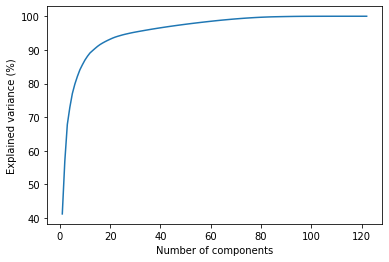

In [ ]:
# plot the variance explanation of the 29 components needed to cover 95% initial data variance 
pca = PCA(None)
pca.fit(train_features)
components = len(pca.explained_variance_ratio_)
plt.plot(range(1,components+1), 
np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [ ]:
# Make an instance of the Model
pca = PCA(.95) # 0.95: means we want 95% of data variance

In [ ]:
pca.fit(train_features)

PCA(n_components=0.95)

In [ ]:
print(pca.n_components_) # how many components make up the 95% of the variance 

29


In [ ]:
train_pca = pca.transform(train_features)  # perform pca
test_pca= pca.transform(test_features)  # pefrorm pca

In [ ]:
# min max scale again the features
min_max_scaler.fit(train_pca)
train_pca = min_max_scaler.transform(train_pca)
test_pca = min_max_scaler.transform(test_pca)

In [ ]:
trainp = pd.DataFrame(train_pca)
testp = pd.DataFrame(test_pca)

In [ ]:
train_frame_pca = [trainp,train_labels]
train_binary_pca = pd.concat(train_frame_pca,axis=1)
train_binary_pca.to_csv('train_binary_pca.csv',index = False)

In [ ]:
test_frame_pca = [testp,test_labels]
test_binary_pca = pd.concat(test_frame_pca,axis=1)
test_binary_pca.to_csv('test_binary_pca.csv',index = False)

# Ranom Forest for Dimensionality Reduction

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=3,
                                 bootstrap=True, n_jobs=-1,
                                 random_state=0)
rf.fit(train_features.values, train_labels.values.ravel())

feature_imp = pd.Series(rf.feature_importances_, 
                        index=train_features.columns).sort_values(ascending=False)

In [ ]:
for i in range(0,len(feature_imp)):
    print(i,end =" ")
    print(feature_imp.index[i],end = ": ")
    print(feature_imp[i])

0 Same_srv_rate: 0.10797313669892639
1 Srv_serror_rate: 0.0927994949619933
2 Diff_srv_rate: 0.0919401117549538
3 x0_SF: 0.08394789689890068
4 Logged_in: 0.08276537445018615
5 Dst_host_srv_serror_rate: 0.0566509307222697
6 Dst_host_same_srv_rate: 0.055308757751561445
7 Dst_host_diff_srv_rate: 0.05349167583734105
8 Serror_rate: 0.041709859298370816
9 Dst_host_srv_count: 0.038481757797788944
10 x0_S0: 0.03538315906808305
11 Count: 0.02954813351125355
12 Dst_host_same_src_port_rate: 0.027738478359165625
13 x0_private: 0.021562332300889792
14 x0_icmp: 0.01974595284209636
15 x0_http: 0.017885054781750755
16 Dst_host_serror_rate: 0.01784472198197527
17 Dst_host_srv_diff_host_rate: 0.015608223289193862
18 Rerror_rate: 0.014108252845520879
19 Dst_host_srv_rerror_rate: 0.012530129816415343
20 x0_eco_i: 0.012252985670118401
21 Srv_diff_host_rate: 0.009408255636407046
22 x0_domain_u: 0.008236251443901053
23 x0_udp: 0.007993057056791587
24 x0_tcp: 0.006815996658243573
25 Dst_host_count: 0.006776123

## Keep only columns with importance over 0.05

In [ ]:
new_features = [] # list containing the new features names
for i in range(0,len(feature_imp)): # for for the range of all features
    if feature_imp[i] > 0.05: # check if importance is over the threshold
        new_features.append(feature_imp.index[i])
print(new_features)

['Same_srv_rate', 'Srv_serror_rate', 'Diff_srv_rate', 'x0_SF', 'Logged_in', 'Dst_host_srv_serror_rate', 'Dst_host_same_srv_rate', 'Dst_host_diff_srv_rate']


In [ ]:
train_features_05 = train_features[new_features] #cast new dataframes
test_features_05 = test_features[new_features]

In [ ]:
# save new files
train_frame = [train_features_05,train_labels]
train_binary_rf05 = pd.concat(train_frame,axis=1)
train_binary_rf05.to_csv('train_binary_rf05.csv',index = False)

In [ ]:
test_frame = [test_features_05,test_labels]
test_binary_rf05 = pd.concat(test_frame,axis=1)
test_binary_rf05.to_csv('test_binary_rf05.csv',index = False)

##Keep only columns with importance over 0.005

In [ ]:
new_features = [] # list containing the new features names
for i in range(0,len(feature_imp)): # for for the range of all features
    if feature_imp[i] > 0.005: # check if importance is over the threshold
        new_features.append(feature_imp.index[i])
print(new_features)

['Same_srv_rate', 'Srv_serror_rate', 'Diff_srv_rate', 'x0_SF', 'Logged_in', 'Dst_host_srv_serror_rate', 'Dst_host_same_srv_rate', 'Dst_host_diff_srv_rate', 'Serror_rate', 'Dst_host_srv_count', 'x0_S0', 'Count', 'Dst_host_same_src_port_rate', 'x0_private', 'x0_icmp', 'x0_http', 'Dst_host_serror_rate', 'Dst_host_srv_diff_host_rate', 'Rerror_rate', 'Dst_host_srv_rerror_rate', 'x0_eco_i', 'Srv_diff_host_rate', 'x0_domain_u', 'x0_udp', 'x0_tcp', 'Dst_host_count', 'Dst_host_rerror_rate', 'Srv_count']


In [ ]:
train_features_005 = train_features[new_features] #cast new dataframes
test_features_005 = test_features[new_features]

In [ ]:
train_frame = [train_features_005,train_labels]
train_binary_rf005 = pd.concat(train_frame,axis=1)
train_binary_rf005.to_csv('train_binary_rf005.csv',index = False)

In [ ]:
test_frame = [test_features_005,test_labels]
test_binary_rf005 = pd.concat(test_frame,axis=1)
test_binary_rf005.to_csv('test_binary_rf005.csv',index = False)